<a href="https://colab.research.google.com/github/KaggleStudy4th/4th_kaggle_study/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/5%EC%A3%BC%EC%B0%A8/Jiin/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_1%EB%B6%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import torch
import torch.optim as optim



In [ ]:
#for reproducibility
torch.manual_seed(1)

## data

In [ ]:
x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[1],[2],[3]])

In [ ]:
print(x_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [ ]:
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


## Weight Initialization

In [ ]:
#학습용 변수라는 것을 명시
W=torch.zeros(1,requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [ ]:
#학습용 변수라는 것을 명시
b=torch.zeros(1,requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


## Weight Initialization

In [ ]:
W=torch.zeros(1,requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [ ]:
b=torch.zeros(1,requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


## Hypothesis

$$ H(x)=Wx+b $$

In [ ]:
hypothesis=x_train*W+b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## Cost

$$ cost(W,b)=1m∑i=1m(H(x(i))−y(i))2 $$

In [ ]:
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
print(y_train)

tensor([[1.],
        [2.],
        [3.]])


In [ ]:
print(hypothesis-y_train)

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)


In [ ]:
print((hypothesis-y_train**2))

tensor([[-1.],
        [-4.],
        [-9.]], grad_fn=<SubBackward0>)


In [ ]:
cost=torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


## Gradient Descent

In [ ]:
# learning rate => lr = 0.01
# W := W - alpha*d/dw*cost(w)

optimizer=optim.SGD([W,b],lr=0.01)#경사하강법 방식 SGD(직접 구현도 가능하지만 파이토치에 저장되어있음)

In [ ]:
#옵티마이저 초기화
optimizer.zero_grad()

#cost 계산 !!! 미분값 계산해서
cost.backward()
#옵티마이저 갱신
optimizer.step()

In [ ]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


In [ ]:
hypothesis=x_train*W+b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [ ]:
cost=torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(3.6927, grad_fn=<MeanBackward0>)


## Training with full code


In [ ]:
# 데이터
X_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[1],[2],[3]])

#모델 초기화
W=torch.zeros(1,requires_grad=True)
b=torch.zeros(1,requires_grad=True)

#optimizer 설정
optimizer=optim.SGD([W,b],lr=0.01)

nb_epochs=1000
for epoch in range(nb_epochs+1):

  #H(x)계산
  hypothesis=x_train*W+b

  #cost 계산
  cost=torch.mean((hypothesis-y_train)**2)

  #cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #100번마다 로그 출력
  if epoch%100==0:
    print('Epoch {:4d}/{} W:{:.3f}, b: {:.3f} Cost:{:.6f}'.format(
        epoch,nb_epochs,W.item(),b.item(),cost.item()
    ))

Epoch    0/1000 W:0.093, b: 0.040 Cost:4.666667
Epoch  100/1000 W:0.873, b: 0.289 Cost:0.012043
Epoch  200/1000 W:0.900, b: 0.227 Cost:0.007442
Epoch  300/1000 W:0.921, b: 0.179 Cost:0.004598
Epoch  400/1000 W:0.938, b: 0.140 Cost:0.002842
Epoch  500/1000 W:0.951, b: 0.110 Cost:0.001756
Epoch  600/1000 W:0.962, b: 0.087 Cost:0.001085
Epoch  700/1000 W:0.970, b: 0.068 Cost:0.000670
Epoch  800/1000 W:0.976, b: 0.054 Cost:0.000414
Epoch  900/1000 W:0.981, b: 0.042 Cost:0.000256
Epoch 1000/1000 W:0.985, b: 0.033 Cost:0.000158


In [ ]:
# H(x) = Wx + b
# 가설설정 => 예측하고자 하는 값 => 시험성적 => 1 * 7 + 0.033 = 

In [ ]:
0.985*9+0.033

8.898

# 텐서플로우와 케라스로 선형회귀 구현하기

## 1. 자동 미분

In [1]:
import tensorflow as tf

tape_gradient()는 자동 미분 기능을 수행합니다. 임의로 라는 식을 세워보고, 에 대해 미분해보겠습니다.

In [3]:
#임의로 2w^2+5라는 식을 세워보고 w에 대해 미분

w=tf.Variable(2.)

def f(w):
  y=w**2
  z=2*y+5
  return z


In [4]:
with tf.GradientTape() as tape:
  z=f(w)

gradients=tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## 2. 자동 미분을 이용한 선형 회귀 구현

가중치 변수 w와 b선언


In [5]:
w=tf.Variable(4.0)
b=tf.Variable(1.0)

In [6]:
#가설을 함수로 정의
def hypothesis(x):
  return w*x+b

In [7]:
x_test=[3.5,5,5.5,6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [8]:
#평균 제곱 오차를 손실함수로 정의
def mse_loss(y_pred,y):
  return tf.reduce_mean(tf.square(y_pred-y))
  #두개의 차이값을 제곱해 평균

In [9]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [12]:
#옵티마이저는 경사 하강법을 사용하되 학습률은 0.01을 사용 learning rate
optimizer=tf.optimizers.SGD(0.01)

In [13]:
#300번에 걸쳐 경사 하강법 수행
for i in range(301):
  with tf.GradientTape() as tape:
    #현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred=hypothesis(x)
    
    #평균 제곱 오차를 계산
    cost=mse_loss(y_pred,y)

  #손실함수에 대한 파라미터의 미분값계산
  gradients=tape.gradient(cost,[w,b])

  #파라미터 업데이트
  optimizer.apply_gradients(zip(gradients,[w,b]))

  if i % 10 == 0:
      print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

w와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인할 수 있습니다. 학습된 w와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인해봅시다.

In [14]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


## 3. 케라스로 구현하는 선형 회귀

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model=Sequential()

model.add(Dense(1,input_dim=1,activation='linear'))

sgd=optimizers.SGD(lr=0.01)

#손실함수 ; 평균제곱오차 mse
model.compile(optimizer=sgd,loss='mse',metrics=['mse'])

#주어진 x와 y데이터에 대해서 오차를 최고화 하는 작업을 300번 시도
model.fit(x,y,epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 1s 725ms/step - loss: 3397.8491 - mse: 3397.8491
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 419.1263 - mse: 419.1263
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 52.6159 - mse: 52.6159
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 7.5186 - mse: 7.5186
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 1.9688 - mse: 1.9688
Epoch 6/300
1/1 [==============================] - 0s 23ms/step - loss: 1.2850 - mse: 1.2850
Epoch 7/300
1/1 [==============================] - 0s 23ms/step - loss: 1.1999 - mse: 1.1999
Epoch 8/300
1/1 [==============================] - 0s 28ms/step - loss: 1.1885 - mse: 1.1885
Epoch 9/300
1/1 [==============================] - 0s 21ms/step - loss: 1.1862 - mse: 1.1862
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1850 - mse: 1.1850
Epoch 11/300
1/1 [==============================] - 0s 10

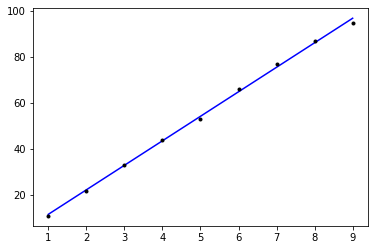

In [18]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [19]:
print(model.predict([9.5]))

[[102.17858]]


9시간을 공부하면 약 98.5점을 얻는대요